In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler

In [ ]:
#load the dataset
df=pd.read_csv('/content/IRIS.csv')

In [ ]:
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
# Step 4: Dataset Dimensions
print("\nDataset Shape (rows, columns):", df.shape)

NameError: name 'df' is not defined

In [ ]:
#data type of the cols
print("\nData Types:",df.dtypes)


Data Types: sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [ ]:
#Summary Statistics
print("\nSummary Statistics:",df.describe())


Summary Statistics:        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


<Figure size 600x600 with 0 Axes>

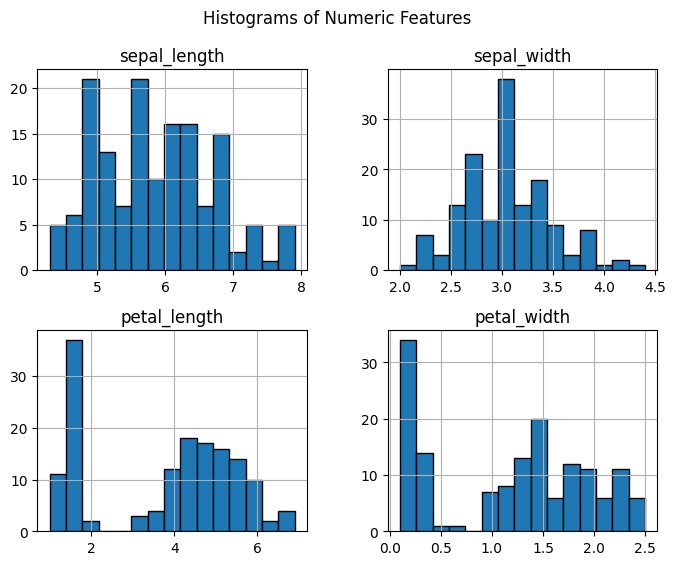

In [ ]:
# Step 7: Visualize Distributions
plt.figure(figsize=(6,6))
df.hist(bins=15, figsize=(8,6), edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.show()

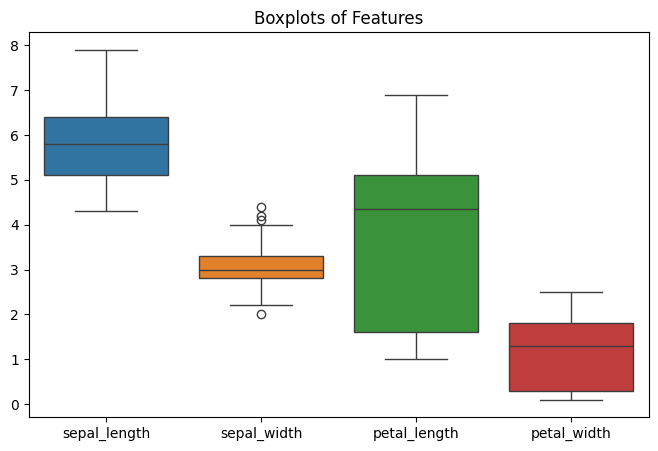

In [ ]:
# Boxplots
plt.figure(figsize=(8,5))
sns.boxplot(data=df.drop(columns=['species']))
plt.title("Boxplots of Features")
plt.show()

In [ ]:
# Check for Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


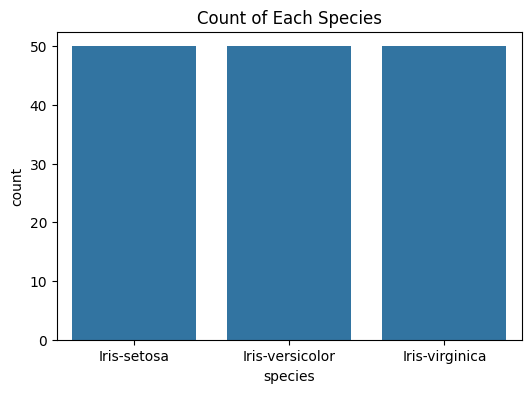

In [ ]:
# Step 8: Frequency Distribution of Categorical Features
plt.figure(figsize=(6,4))
sns.countplot(x='species', data=df)
plt.title("Count of Each Species")
plt.show()

In [ ]:
# 1 Label Encoding
label_encoder = LabelEncoder()
df['species_label'] = label_encoder.fit_transform(df['species'])
print("\nLabel Encoded DataFrame:")
print(df[['species', 'species_label']].head())

# 2 One-Hot Encoding
df_onehot = pd.get_dummies(df, columns=['species'])
print("\nOne-Hot Encoded DataFrame:")
print(df_onehot.head())



Label Encoded DataFrame:
   species  species_label
0        0              0
1        0              0
2        0              0
3        0              0
4        0              0

One-Hot Encoded DataFrame:
   sepal_length  sepal_width  petal_length  petal_width  species_label  \
0           5.1          3.5           1.4          0.2              0   
1           4.9          3.0           1.4          0.2              0   
2           4.7          3.2           1.3          0.2              0   
3           4.6          3.1           1.5          0.2              0   
4           5.0          3.6           1.4          0.2              0   

   species_0  species_1  species_2  
0       True      False      False  
1       True      False      False  
2       True      False      False  
3       True      False      False  
4       True      False      False  


In [ ]:
# Feature Scaling
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('species_label')

#  Standardization
scaler_std = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = scaler_std.fit_transform(df[numeric_cols])
print("\nStandardized Features (mean≈0, sd≈1):")
print(df_standardized.head())

#  Normalization
scaler_norm = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler_norm.fit_transform(df[numeric_cols])
print("\nNormalized Features (range [0,1]):")
print(df_normalized.head())


Standardized Features (mean≈0, std≈1):
   sepal_length  sepal_width  petal_length  petal_width   species  \
0     -0.900681     1.032057     -1.341272    -1.312977 -1.224745   
1     -1.143017    -0.124958     -1.341272    -1.312977 -1.224745   
2     -1.385353     0.337848     -1.398138    -1.312977 -1.224745   
3     -1.506521     0.106445     -1.284407    -1.312977 -1.224745   
4     -1.021849     1.263460     -1.341272    -1.312977 -1.224745   

   species_label  
0              0  
1              0  
2              0  
3              0  
4              0  

Normalized Features (range [0,1]):
   sepal_length  sepal_width  petal_length  petal_width  species  \
0      0.222222     0.625000      0.067797     0.041667      0.0   
1      0.166667     0.416667      0.067797     0.041667      0.0   
2      0.111111     0.500000      0.050847     0.041667      0.0   
3      0.083333     0.458333      0.084746     0.041667      0.0   
4      0.194444     0.666667      0.067797     0.041667

In [ ]:
# Select features
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species_label']
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Training labels:", y_train.shape)
print("Testing labels:", y_test.shape)


Training set size: (120, 4)
Testing set size: (30, 4)
Training labels: (120,)
Testing labels: (30,)


In [ ]:
print("X_train -> type:", type(X_train), "  shape:", X_train.shape)
print("X_test  -> type:", type(X_test),  "  shape:", X_test.shape)
print("y_train -> type:", type(y_train), "  shape:", y_train.shape)
print("y_test  -> type:", type(y_test),  "  shape:", y_test.shape)

X_train -> type: <class 'pandas.core.frame.DataFrame'>   shape: (120, 4)
X_test  -> type: <class 'pandas.core.frame.DataFrame'>   shape: (30, 4)
y_train -> type: <class 'pandas.core.series.Series'>   shape: (120,)
y_test  -> type: <class 'pandas.core.series.Series'>   shape: (30,)
